# Problems solved in Sydsaeter et. al (2008), Chapters 5 and 6

## Load necessary Python stuff

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sym
sym.init_printing(use_unicode=True)

## Example 1 (p. 195)
Solve the differential equation
$$
    \dfrac{dx}{dt} = -2tx^{2}
$$
and find the integral curve that passes through $(t,x) = (1,-1)$.

### Solution (analytical):
This is a separable equation so
$$
    -\dfrac{dx}{x^{2}} = 2t\,dt
$$

Integrate:
$$
    -\int\dfrac{dx}{x^{2}} = \int 2t\,dt
$$

$$
    \dfrac{1}{x} = t^{2} + C \quad \Rightarrow \quad x = \dfrac{1}{t^{2} + C}
$$

The curve that passes through $(1, -1)$:
$$
    -1 = \dfrac{1}{1^2 + C} \quad \Rightarrow \quad C = -2
$$

### Solution (using Sympy):

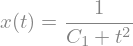

In [2]:
t = sym.symbols('t')
x = sym.symbols('x', cls=sym.Function)
sol = sym.dsolve(x(t).diff(t) + 2*t*pow(x(t),2), x(t))
sol

In [3]:
C1 = sym.symbols('C1')
constant = sym.solve([sol.args[1].subs(t,1) + 1], C1)
constant

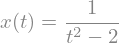

In [4]:
final_sol = sol.subs(constant)
final_sol

### Plot solution

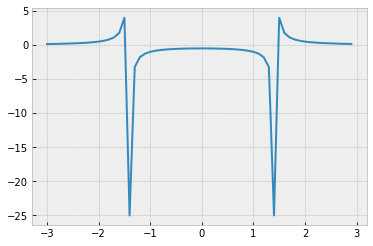

In [5]:
func = sym.lambdify(t, final_sol.rhs,'numpy')
xvals = np.arange(-3,3,0.1)
yvals = func(xvals)

with plt.style.context('bmh'):
    plt.figure()
    plt.plot(xvals, yvals)


### Solve the problem
$$
    \dot{x}(t) + 5x(t) = 11t, \quad x(0) = 3
$$

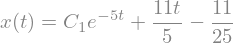

In [6]:
t = sym.symbols('t')
x = sym.symbols('x', cls=sym.Function)
sol = sym.dsolve(x(t).diff(t) + 5*x(t) - 11*t, x(t))
sol

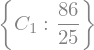

In [7]:
C1 = sym.symbols('C1')
constant = sym.solve([sol.args[1].subs(t,0) - 3], C1)
constant

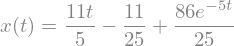

In [8]:
final_sol = sol.subs(constant)
final_sol

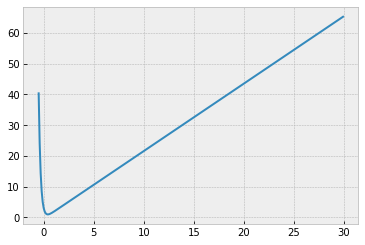

In [9]:
func = sym.lambdify(t, final_sol.rhs,'numpy')
xvals = np.arange(-0.5,30,0.1)
yvals = func(xvals)

with plt.style.context('bmh'):
    plt.figure()
    plt.plot(xvals, yvals)


## Second-order differential equations

Solve the problem
$$
    \ddot{x}(t) = 5
$$

### Solution ("pen and paper")
Integrate once
$$
    \int \ddot{x}(t)\,dt = \dot{x}(t) = 5t + C_{1}
$$

Integrate once more
$$
    \int\dot{x}(t)\,dt = x(t) = 5\dfrac{t^{2}}{2} + C_{1}t + C_{2}
$$

### Solution (Sympy)

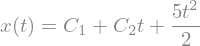

In [10]:
t = sym.symbols('t')
x = sym.symbols('x', cls=sym.Function)
sol = sym.dsolve(x(t).diff(t,2) - 5, x(t))
sol

### Example: $x$ missing (Example 2 on p. 224)
Solve
$$
    \ddot{x} = \dot{x} + t
$$

### Solution
Set $\dot{x} = u$. The equation becomes
$$
    \dot{u} = u + t \Leftrightarrow \dot{u} - u = t
$$

Here $ b(t) = t $ so 

$$
    u(t) = e^{t}\int t\cdot e^{-t}\ dt + C_{1}e^{t} \Rightarrow u(t) = e^{t}[-e^{-t}(t+1)] + C_{1}e^{t}
$$

The solution is then (after simplification):
$$
    u(t) = C_{1}e^{t} - t - 1
$$

Now
$$
    \dot{x} = C_{1}e^{t} - t - 1
$$

Integrate:
$$
    \int \dot{x}\,dx = x(t) = C_{1}e^{t} - \dfrac{t^{2}}{2} - t + C_{2}
$$

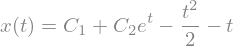

In [11]:
# Sympy
t = sym.symbols('t')
x = sym.symbols('x', cls=sym.Function)
sol = sym.dsolve(x(t).diff(t,2) - x(t).diff(t) - t, x(t))
sol

## Linear second-order ODE
### Homogeneous case
Solve
$$
    \ddot{x} - 7\dot{x} + 12x = 0
$$



### Solution
Characteristic equation:
$$
    r^{2} - 7r + 12 = 0
$$

Discriminant: $D = 49-48 = 1; \quad \sqrt{D} = 1$

Roots:
$$
    r_{1,2} = \dfrac{7 \pm 1}{2}
$$

ODE Solution:
$$
    x(t) = C_{1}e^{4t} + C_{2}e^{3t}
$$

In [12]:
# Sympy
t = sym.symbols('t')
x = sym.symbols('x', cls=sym.Function)
sol = sym.dsolve(x(t).diff(t,2) - 7*x(t).diff(t) + 12*x(t), x(t))
sol

### Still the homogeneous case
Solve
$$
    \ddot{x} - 6\dot{x} + 12x = 0
$$


### Solution
Characteristic equation:
$$
    r^{2} - 6r + 12 = 0
$$

Discriminant: $D = 36-48 = -12 < 0; \quad \sqrt{D} = 2i\sqrt{3}$
    
Roots:
$$
    r_{1,2} = \dfrac{6 \pm 2i\sqrt{3}}{2}=3 \pm i\sqrt{3}
$$

$\alpha = 3$; $\beta = \sqrt{3}$

ODE Solution:
$$
    x(t) = e^{3t}\left(C_{1}\cos(\sqrt{3}t) + C_{2}\sin(\sqrt{3}t)\right)
$$

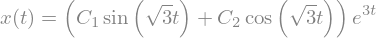

In [13]:
# Sympy
t = sym.symbols('t')
x = sym.symbols('x', cls=sym.Function)
sol = sym.dsolve(x(t).diff(t,2) - 6*x(t).diff(t) + 12*x(t), x(t))
sol

## Non-homogeneous (Case 1)
Solve
$$
    \ddot{x}(t) + 2\dot{x}(t) - x(t) = 3
$$

In [14]:
# Sympy
t = sym.symbols('t')
x = sym.symbols('x', cls=sym.Function)
sol = sym.dsolve(x(t).diff(t,2) + 2*x(t).diff(t) - x(t) - 3, x(t))
sol

## Non-homogeneous (Case 2)
Solve
$$
    \ddot{x} - 4\dot{x} + 4x = t^{2} + 2
$$

### Solution (by hand)
The homogeneous solution is found as follows. Solve the characteristic equation
$$
    r^{2} - 4r + 4 = 0
$$

Its discriminant equals 0, so there is a double real root equal to 2. The homogeneous solution is then
$$
    x(t) = (C_{1} + C_{2}t)e^{2t}
$$

The RHS of the non-homogeneous equation is a quadratic polynomial, so suppose that the particular solution is
$$
    u^{*}(t) = At^{2} + Bt + C
$$

where $A, B, $ and $C$ are arbitrary constants. We have
$$
    \dot{u}^{*}(t) = 2At + B, \quad \ddot{u}^{*}(t) = 2A
$$

Substitute in the equation:
$$
    2A - 4(2At + B) + 4(At^{2} + Bt + C) = t^2 + 2
$$

Rearrange:
$$
    4At^{2} - (8A - 4B)t + 2A - 4B + 4C = t^2 + 2
$$

Equating coefficient before like powers leads to:
$$
    A = \dfrac{1}{4}, \quad B = \dfrac{1}{2}, \quad C = \dfrac{7}{8}
$$

Thus the general solution becomes
$$
    x(t) = (C_{1} + C_{2}t)e^{2t} + \dfrac{t^{2}}{4} + \dfrac{t}{2} + \dfrac{7}{8}
$$

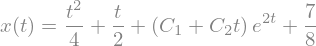

In [15]:
# Sympy
t = sym.symbols('t')
x = sym.symbols('x', cls=sym.Function)
sol = sym.dsolve(x(t).diff(t,2) - 4*x(t).diff(t) + 4*x(t) - pow(t,2) - 2, x(t))
sol

## Non-homogeneous (Case 3)
Solve
$$
    \ddot{x}(t) + 7\dot{x}(t) + 8x(t) = 15e^{3t}
$$

### Solution
The characteristic equation is
$$
    r^{2} + 7r + 8 = 0
$$

Its discriminant equals $D = 49 - 32 = 17 \Rightarrow \sqrt{D} = \sqrt{17}$. The roots are therefore
$$
    r_{1,2} = \dfrac{-7 \pm \sqrt{17}}{2}
$$

The homogeneous solution is then
$$
    x(t) = C_{1}e^{\frac{-7 + \sqrt{17}}{2}t} + C_{2}e^{\frac{-7 - \sqrt{17}}{2}t}
$$

The particular solution should have the form $u^{*}(t) = Ae^{3t}$ where $A$ is a constant. With this,
$$
    \dot{u}^{*}(t) = 3Ae^{3t}, \quad \ddot{u}^{*}(t) = 9Ae^{3t}.
$$

Substitute those in the equation
$$
    9Ae^{3t} + 21Ae^{3t} + 8Ae^{3t} = 15e^{3t}
$$

Undetermined coefficients used once again leads to $A = \dfrac{15}{38}$. The general solution is:

$$
    x(t) = C_{1}e^{\frac{-7 + \sqrt{17}}{2}t} + C_{2}e^{\frac{-7 - \sqrt{17}}{2}t} + \dfrac{15}{38}e^{3t}
$$

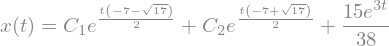

In [16]:
# Sympy
t = sym.symbols('t')
x = sym.symbols('x', cls=sym.Function)
sol = sym.dsolve(x(t).diff(t,2) + 7*x(t).diff(t) + 8*x(t) - 15*sym.exp(3*t), x(t))
sol

## Non-homogeneous (Case 4)
Solve
$$
    \ddot{x} - 4 \dot{x} + 4x = 2\cos (2t)
$$

### Solution
Homogeneous equation already solved above, solution
$$
    x(t) = (C_{1} + C_{2}t)e^{2t}
$$

To find a particular solution, try $u^{*}(t) = A\cos(2t)$; derivatives:
$$
    \dot{u}^{*}(t) = -2A\sin(2t), \quad  \ddot{u}^{*}(t) = -4A\cos(2t)
$$

If we substitute in the equation, we will get a term including $\sin (2t)$ on the LHS and no such in the RHS

Therefore, try $u^{*}(t) = A\cos(2t) + B\sin(2t)$; derivatives:
$$
    \dot{u}^{*}(t) = -2A\sin(2t) + 2B\cos(2t), \quad \ddot{u}^{*}(t) = -4A\cos(2t) - 4B\sin(2t)
$$
Substitute in the equation:
$$
    -4A\cos(2t) - 4B\sin(2t) + 8A\sin(2t) - 8B\cos(2t) + 4A\cos(2t) + 4B\sin(2t) = 2\cos(2t)
$$

Simplify:
$$
     8A\sin(2t) - 8B\cos(2t) = 2\cos(2t)
$$

From this, $A = 0, B = -\dfrac{1}{4}$

The general solution becomes

$$
    x(t) = (C_{1} + C_{2}t)e^{2t} - \dfrac{\sin(2t)}{4}
$$
    

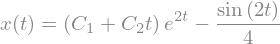

In [17]:
# Sympy
t = sym.symbols('t')
x = sym.symbols('x', cls=sym.Function)
sol = sym.dsolve(x(t).diff(t,2) - 4*x(t).diff(t) + 4*x(t) - 2*sym.cos(2*t), x(t))
sol